In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def crop_image(image):
    '''
    This function crops the image so the result is only a small middle chunk. This makes it easier for the Hough Line
    transform to identify only the train tracks rather than random lines throughout the rest of the image.
    Crops the bottom half of the middle 1/5th of the image.

    :param image: An image imported through cv2.imread()
    :return: Cropped image according to rules specified within function.
    '''
    # Get the dimensions of the image
    height, width = image.shape[:2]

    # Define the region of interest (ROI)
    roi_x = 2 * width // 5  # Starting x-coordinate of the ROI (left boundary of the middle fifth)
    roi_width = width // 5  # Width of the ROI (1/5 of the width of the image)

    # Define the bottom half of the ROI
    bottom = height # The height of the image = the bottom coordinate
    bottom_roi_height = height//2  # Height of the bottom half

    # Crop the region of interest from the image
    roi = image[bottom_roi_height:bottom, roi_x:roi_x+roi_width]

    return roi, roi_x, bottom_roi_height

turn_right
turn_right_object
turn_right_train
turn_left
turn_left_right
turn_left2
straight_object
straight_train
train_photo


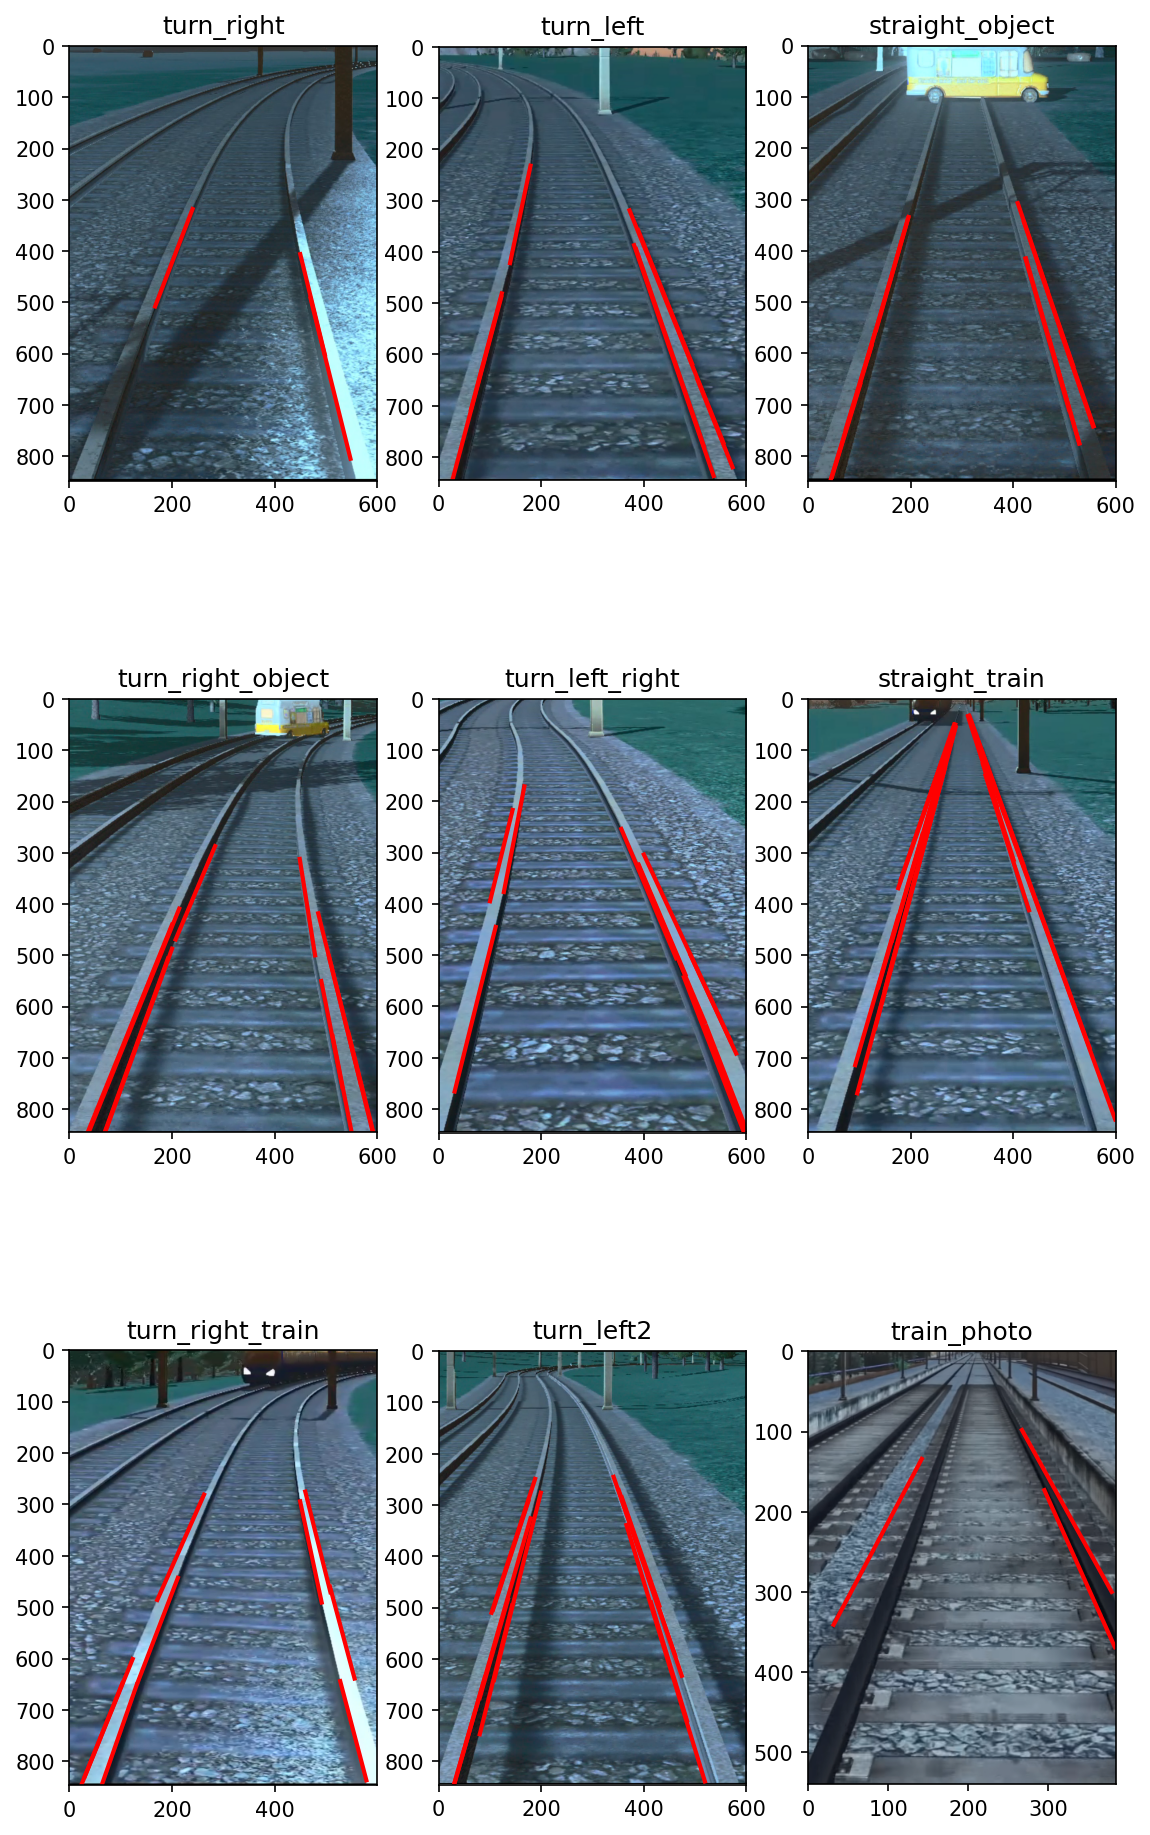

In [11]:
image_names = ['turn_right','turn_right_object','turn_right_train',
               'turn_left','turn_left_right','turn_left2',
               'straight_object','straight_train','train_photo']

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (9,16), dpi = 150)

for n, filename in enumerate(image_names):

    print(filename)

    i = n % 3
    j = n//3

    image = cv2.imread(f"../Intramotev/inputs/{filename}.png")

    image, x_tmp, y_tmp = crop_image(image)

    # blur = cv2.bilateralFilter(image, d = 15, sigmaColor = 75, sigmaSpace = 75)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray, 150, 250)
    edges = cv2.dilate(edges, np.ones((2,3), dtype = np.uint8))
    edges = cv2.erode(edges, np.ones((3,2), dtype = np.uint8))

    length = edges.shape[0]
    lines = cv2.HoughLinesP(edges, rho = 1, theta = np.pi/180, threshold = 10,
                            minLineLength=170, maxLineGap=10)
    # lines = np.squeeze(lines)

    # print(lines)

    ax[i, j].imshow(image)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            slope = None
            intercept = None

            if y2-y1 != 0:
                slope = (x2 - x1) / (y2 - y1)
                intercept = x1 - slope * y1

            if slope is not None and intercept is not None:
                # print(slope, intercept)
                if np.abs(slope) < .8 and intercept < 450 and intercept > 150:

                    # print(slope, intercept)
                    ax[i, j].plot((x1, x2), (y1, y2), linewidth=2, c = 'red')
    else:
        print("No lines found")

    ax[i, j].set_xlim(0, image.shape[1])
    ax[i, j].set_ylim(image.shape[0], 0)
    ax[i, j].set_title(filename)

    # break

# plt.show()

# edges = cv2.Canny(gray, 50, 150, apertureSize=3)
# plt.figure(dpi = 200)
# plt.imshow(edges)